# Optimization using Scipy i.e `scipy.optimize`

In [4]:
# set up the development enviroments
import numpy as np
import scipy.linalg as la
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Single Variable Functions

No handles with labels found to put in legend.


f(89): 7921


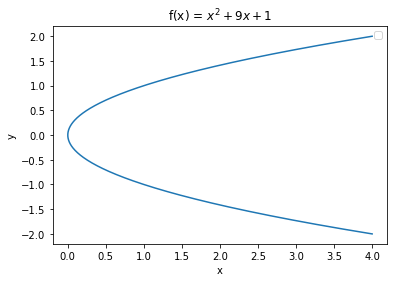

In [43]:

f = lambda x: x**2
print("f(89):", f(89))
# initialize the value of x in certain range 
x = np.linspace(-2, 2, 500)
plt.plot(f(x), x)
plt.xlabel('x')
plt.ylabel('y')
plt.title("f(x) = $x^{2} + 9x + 1$")
plt.legend()
plt.show()

In [44]:
# finding the minima of this curve
# Objective function. Scalar function, must return a scalar.
# Local minimization of scalar function of one variable.
min = opt.minimize_scalar(f)
min

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.0
       x: 0.0
     nit: 4
    nfev: 7

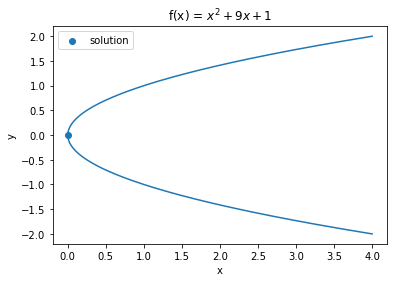

In [45]:
x = np.linspace(-2, 2, 500)
plt.plot(f(x), x)
plt.scatter([min.x], [min.fun], label='solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("f(x) = $x^{2} + 9x + 1$")
plt.legend()
plt.show()

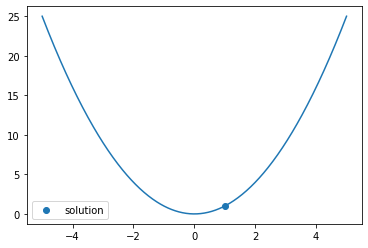

In [46]:
# let's add constraints x >= 1 then 
sol = opt.minimize_scalar(f, bounds=(1, 1000), method='bounded')
x = np.linspace(-5,5,500)
plt.plot(x, f(x))
plt.scatter([sol.x], [sol.fun], label='solution')
plt.legend()
plt.show()



<ipython-input-37-1df52e6ecde4>:1: RuntimeWarning: invalid value encountered in power
  f = lambda x : (x - 2)**2/3 * (x + 2)**2/3 - x**(1.3)
No handles with labels found to put in legend.


2650359643.8735137


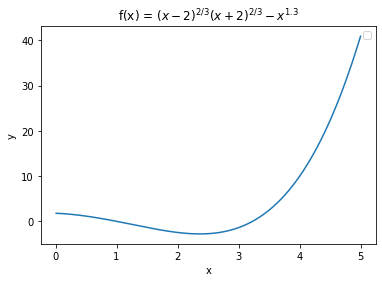

In [37]:
f = lambda x : (x - 2)**2/3 * (x + 2)**2/3 - x**(1.3)

print(f(393))

x = np.linspace(-5, 5, 500)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = $(x - 2)^{2/3} (x + 2)^{2/3} - x^{1.3}$')
plt.legend()
plt.show()

[2.3665310514335505]


<ipython-input-37-1df52e6ecde4>:1: RuntimeWarning: invalid value encountered in power
  f = lambda x : (x - 2)**2/3 * (x + 2)**2/3 - x**(1.3)


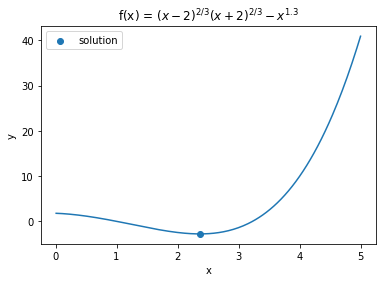

In [39]:
sol = opt.minimize_scalar(f)
x = np.linspace(-5, 5, 500)
print([sol.x])
plt.scatter([sol.x], [sol.fun], label='solution')
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = $(x - 2)^{2/3} (x + 2)^{2/3} - x^{1.3}$')
plt.legend()
plt.show()


<ipython-input-37-1df52e6ecde4>:1: RuntimeWarning: invalid value encountered in power
  f = lambda x : (x - 2)**2/3 * (x + 2)**2/3 - x**(1.3)


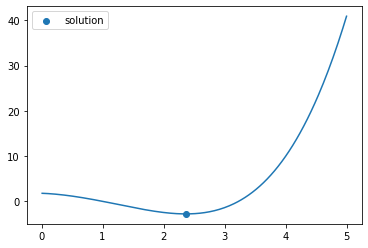

In [41]:
# let's add constraints x >= 1 to see the solutions
sol = opt.minimize_scalar(f, bounds=(1, 1000), method='bounded')
x = np.linspace(-5,5,500)
plt.plot(x, f(x))
plt.scatter([sol.x], [sol.fun], label='solution')
plt.legend()
plt.show()

### 2. Multi Variable Functions
The multivariate quadratics form $x^T A x + b^T x + c$ where $x \in R^n$ and $A \in R^{mxn}$

In [55]:
n = 2 # number of independent variables
A = np.random.randn(n,n) # generate a random matrix of dim 3x2 
b = np.random.randn(n)

f = lambda x: np.dot(x-b, A @ (x-b))

sol = opt.minimize(f, np.zeros(n))
sol


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -283076.52934196056
        x: [ 9.642e+02  5.060e+01]
      nit: 1
      jac: [-6.971e+02  2.113e+03]
 hess_inv: [[ 1.142e+01  4.219e+00]
            [ 4.219e+00  1.414e+00]]
     nfev: 348
     njev: 112

In [56]:
print(sol.x, sol.fun)


[964.15932083  50.60410118] -283076.52934196056


In [58]:
print(b)
print(la.norm(sol.x -b))


[0.19366828 0.49468862]
965.2671819409132


In [60]:
# rough idea we can increase the number of independent variables upto certain higher dim
n = 100
A = np.random.randn(n+1,n)
A = A.T @ A

b = np.random.rand(n)

f = lambda x : np.dot(x - b, A @ (x - b)) # (x - b)^T A (x - b)

sol = opt.minimize(f, np.zeros(n))
print(sol)
print(la.norm(sol.x - b))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.627401352740875e-10
        x: [ 1.574e-01  4.310e-01 ...  1.415e-01  6.544e-01]
      nit: 122
      jac: [-3.629e-08 -1.181e-06 ...  4.563e-07 -7.903e-07]
 hess_inv: [[ 1.004e+01 -1.500e+00 ...  6.227e+00 -3.190e+00]
            [-1.500e+00  2.959e-01 ... -1.036e+00  5.297e-01]
            ...
            [ 6.227e+00 -1.036e+00 ...  4.987e+00 -1.846e+00]
            [-3.190e+00  5.297e-01 ... -1.846e+00  1.233e+00]]
     nfev: 13130
     njev: 130
0.00030993826439077414
